# Rachunek różniczkowy i różnicowy

### W tym zeszycie rozwiązano problem nr. 5 - Potencjał elektryczny.

### Kod rozwiązania problemu

In [17]:
import numpy as np
import matplotlib.pyplot as plt
global h
global ro

In [18]:
def eps_r(x):
    if 0 <= x <= 1:
        return 10
    elif 1 < x <= 2:
        return 5
    elif 2 < x <= 3:
        return 1
    return None


def integral(left_bound, right_bound, f, num=10**3):
    res = 0
    l = (right_bound - left_bound) / num
    for i in range(num):
        res += l * f(left_bound + l*(i+0.5))
    return res


def ei(i, x):
    if x < h * (i-1):
        return 0
    elif x < h*i:
        return x/h - (i-1)
    elif x < h * (i+1):
        return -x/h + (i+1)
    else:
        return 0


def d_ei(i, x):
    if x < h * (i-1):
        return 0
    elif x < h*i:
        return 1/h
    elif x < h * (i+1):
        return -1/h
    else:
        return 0


def B_value(j, i):
    if abs(j-i) > 1:
        return 0
    u0 = ei(j, 0)
    v0 = ei(i, 0)
    left_bound = max(h * (i-1), h * (j-1), 0)
    right_bound = min(h * (i+1), h * (j+1), 3)
    def f(x):
        return d_ei(j, x) * d_ei(i, x)
    return u0*v0 - integral(left_bound, right_bound, f)


def L_value(i):
    v0 = ei(i, 0)
    left_bound = max(h * (i-1), 0)
    right_bound = min(h * (i+1), 3)
    def f(x):
        return ro/eps_r(x) * ei(i, x)
    return 5*v0 - integral(left_bound, right_bound, f)


def L_final_value(i, n):
    return L_value(i) - 2*B_value(n, i)


def create_B_matrix(n):
    B = [[0 for _ in range(n)] for _ in range(n)]
    B[0][0] = B_value(0, 0)
    B[0][1] = B_value(1, 0)
    B[n-1][n-2] = B_value(n-2, n-1)
    B[n-1][n-1] = B_value(n-1, n-1)
    for i in range(1, n-1):
        for j in range(i-1, i+2):
            B[i][j] = B_value(j, i)
    return B


def create_L_matrix(n):
    L = [0 for _ in range(n)]
    for i in range(n):
        L[i] = L_final_value(i, n)
    return L


def get_solution(n):
    global h
    h = 3 / n
    global ro
    ro = 1

    B = np.array(create_B_matrix(n))
    L = np.array(create_L_matrix(n))
    U = np.linalg.solve(B, L)

    def get_y(x):
        res = 0
        for i in range(n):
            res += U[i] * ei(i, x)
        return res + 2*ei(n, x)

    X = [h*i for i in range(n+1)]
    Y = [get_y(x) for x in X]

    return X, Y

### Kod wyświetlania wykresu

In [19]:
def draw_plot(X, Y):
    plt.plot(X, Y, linestyle='-', color='black')
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.title('Wykres funkcji potencjału elektrycznego')
    plt.show()


### Wykresy poszukiwanej funkcji dla różnych n

[0.0, 0.3, 0.6, 0.8999999999999999, 1.2, 1.5, 1.7999999999999998, 2.1, 2.4, 2.6999999999999997, 3.0]
[5.97493999100002, 5.677957993700018, 5.371975996400016, 5.056993999100014, 4.731015999800012, 4.3875400025000095, 4.0260640052000065, 3.642571991900003, 3.185047994600001, 2.6375239972999998, 2.0]


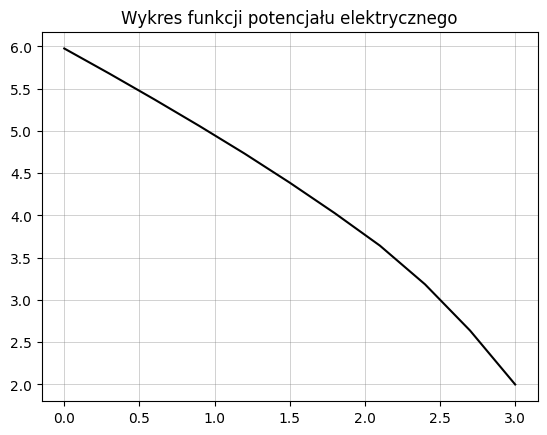

In [20]:
X10, Y10 = get_solution(10)
print(X10)
print(Y10)
draw_plot(X10, Y10)

[0.0, 0.006, 0.012, 0.018000000000000002, 0.024, 0.03, 0.036000000000000004, 0.042, 0.048, 0.054, 0.06, 0.066, 0.07200000000000001, 0.078, 0.084, 0.09, 0.096, 0.10200000000000001, 0.108, 0.114, 0.12, 0.126, 0.132, 0.138, 0.14400000000000002, 0.15, 0.156, 0.162, 0.168, 0.17400000000000002, 0.18, 0.186, 0.192, 0.198, 0.20400000000000001, 0.21, 0.216, 0.222, 0.228, 0.234, 0.24, 0.246, 0.252, 0.258, 0.264, 0.27, 0.276, 0.28200000000000003, 0.28800000000000003, 0.294, 0.3, 0.306, 0.312, 0.318, 0.324, 0.33, 0.336, 0.342, 0.34800000000000003, 0.354, 0.36, 0.366, 0.372, 0.378, 0.384, 0.39, 0.396, 0.402, 0.40800000000000003, 0.41400000000000003, 0.42, 0.426, 0.432, 0.438, 0.444, 0.45, 0.456, 0.462, 0.468, 0.47400000000000003, 0.48, 0.486, 0.492, 0.498, 0.504, 0.51, 0.516, 0.522, 0.528, 0.534, 0.54, 0.546, 0.552, 0.558, 0.5640000000000001, 0.5700000000000001, 0.5760000000000001, 0.582, 0.588, 0.594, 0.6, 0.606, 0.612, 0.618, 0.624, 0.63, 0.636, 0.642, 0.648, 0.654, 0.66, 0.666, 0.672, 0.678, 0.6

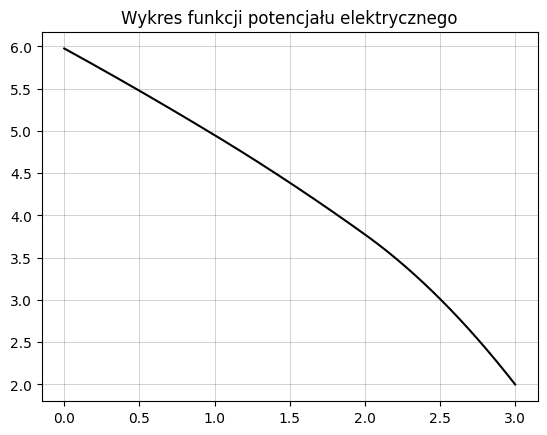

In [21]:
X500, Y500 = get_solution(500)
print(X500)
print(Y500)
draw_plot(X500, Y500)

[0.0, 0.003, 0.006, 0.009000000000000001, 0.012, 0.015, 0.018000000000000002, 0.021, 0.024, 0.027, 0.03, 0.033, 0.036000000000000004, 0.039, 0.042, 0.045, 0.048, 0.051000000000000004, 0.054, 0.057, 0.06, 0.063, 0.066, 0.069, 0.07200000000000001, 0.075, 0.078, 0.081, 0.084, 0.08700000000000001, 0.09, 0.093, 0.096, 0.099, 0.10200000000000001, 0.105, 0.108, 0.111, 0.114, 0.117, 0.12, 0.123, 0.126, 0.129, 0.132, 0.135, 0.138, 0.14100000000000001, 0.14400000000000002, 0.147, 0.15, 0.153, 0.156, 0.159, 0.162, 0.165, 0.168, 0.171, 0.17400000000000002, 0.177, 0.18, 0.183, 0.186, 0.189, 0.192, 0.195, 0.198, 0.201, 0.20400000000000001, 0.20700000000000002, 0.21, 0.213, 0.216, 0.219, 0.222, 0.225, 0.228, 0.231, 0.234, 0.23700000000000002, 0.24, 0.243, 0.246, 0.249, 0.252, 0.255, 0.258, 0.261, 0.264, 0.267, 0.27, 0.273, 0.276, 0.279, 0.28200000000000003, 0.28500000000000003, 0.28800000000000003, 0.291, 0.294, 0.297, 0.3, 0.303, 0.306, 0.309, 0.312, 0.315, 0.318, 0.321, 0.324, 0.327, 0.33, 0.333, 0

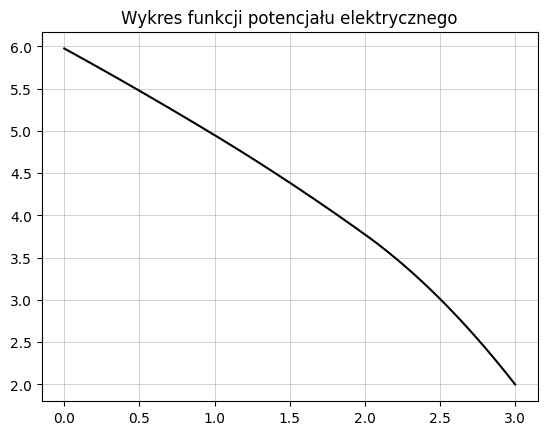

In [22]:
X1000, Y1000 = get_solution(1000)
print(X1000)
print(Y1000)
draw_plot(X1000, Y1000)